# Challenge 01: Conversor de Celsius a Valks

**Autor:** Rodolfo Jesús Cruz Rebollar

**Matrícula:** A01368326

**Grupo:** 101

In [1]:
# Importar librerías para el análisis, manipulación y graficación de datos

import pandas as pd # Pandas para análisis y manipulación de datos

import numpy as np # numpy para realizar operaciones matemáticas y matriciales

import matplotlib.pyplot as plt # Matplotlib para realizar gráficos

In [2]:
# Importar los datos a analizar, leyéndolos del archivo csv

celsius_valks = pd.read_csv("Valhalla23.csv")

# Mostrar primeros 5 registros del dataframe para asegurar que los datos se hayan importado correctamente

celsius_valks.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


In [3]:
# Mostrar características generales de la base de datos

celsius_valks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Celsius  100 non-null    float64
 1   Valks    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


Al observar las características generales de la base de datos, se puede notar que en total se tienen 100 registros de datos con 2 columnas, correspondientes a la temperatura en Celsius y Valks respectivamente, además, se aprecia que ambas columnas de información no presentan datos faltantes, ya que todos los datos en ambas son no nulos, motivo por el cual, al no detectar ninguna inconsistencia o error en la estructura de los datos, a continuación se procederá a separar el conjunto principal de datos en 2 subconjuntos, 1 para el entrenamiento del modelo de regresión lineal y otro para ponerlo a prueba. 

## Creación del conjunto de entrenamiento y de prueba

### Conjunto de entrenamiento

In [4]:
# Importar librería random que contiene funciones para elegir aleatoriamente elementos de estructuras de datos o generar
# valores aleatorios

import random as rnd

# Generar el conjunto de datos de entrenamiento para el modelo (el 70% de los datos originales se destinará para entrenamiento)

train_data = celsius_valks.iloc[rnd.choices(range(celsius_valks.shape[0]), k = round(0.7 * celsius_valks.shape[0])), :]

# Mostrar los primeros registros del subconjunto de datos para entrenar el modelo 

train_data.head()


,Celsius,Valks
84,71.719,-182.570
37,11.710,16.143
86,55.720,-121.090
63,49.908,-108.590
1,70.579,-156.600


En términos generales, para generar el subconjunto de datos para entrenar el modelo, lo primero que se realizó fue calcular cuántos registros (filas) tiene el conjunto total de datos con ayuda de la función shape que devuelve una tupla con dos elementos, el primero es la cantidad de filas del dataframe y el segundo es la cantidad de columnas del mismo, por lo que en este caso particular, se toma solamente el primer elemento de la tupla devuelta por la función shape (tiene como índice 0) que coresponde a la cantidad de registros del dataframe original, para luego en base a la cantidad de filas, la función range() genera una secuencia de números enteros desde 0 hasta la cantidad de filas menos 1, por lo que al tener 100 filas, range devolverá una secuencia de enteros desde 0 hasta 99 y dicha secuencia de enteros es recibida por la función choices() del módulo random, la cual escoge aleatoriamente una cierta cantidad de elementos de una lista, especificada en su parámetro k, que en este caso, dicha cantidad k se calcula obteniendo el 70% de la cantidad de filas del dataframe original y luego redondeando dicho resultado al entero más cercano, esto con el objetivo de evitar tener errores de formato numérico al momento de ejecutar el renglón de código en caso de que al calcular el porcentaje de datos para entrenamiento, se obtenga una cantidad con decimales. Además de lo anterior, después de calcular el valor k y definir la secuencia de enteros aleatorios para la función choices(), se procede a que la función choices() elige aleatoriamente k valores enteros de la secuencia definida previamente y envía dicha lista de enteros aleatorios al método iloc para decirle que extraiga las filas especificadas en la lista que recibe dicho método , mismas que se encuentran identificadas por su índice numérico (son los enteros aleatorios obtenidos antes) y a su vez también extraiga todas las columnas que conforman a dichas filas. Es importante recalcar que el método iloc identifica filas y columnas mediante su índice numérico en lugar de sus nombres. 

### Conjunto de prueba

In [5]:
# El conjunto de prueba estará conformado por todos los datos que no fueron seleccionados de forma aleatoria al momento de 
# generar el conjunto de entrenamiento

# Obtener los índices numéricos de las filas que no fueron seleccionadas al generar el conjunto de entrenamiento

# la función lambda en conjunto con la función filter, verifican si cada índice de fila del dataframe completo 
# se encuentra entre los índices de fila del subconjunto de entrenamiento, de no ser así, se selecciona dicho índice para
# incluir la fila correspondiente al mismo, al conjunto de prueba, esto garantiza que el subconjunto de prueba tenga datos que
# el modelo aún no haya visto y finalmente se incluyen los índices filtrados en una nueva lista

filas_no_elegidas = list(filter(lambda x: x not in train_data.index.values, celsius_valks.index.values))

# Extraer las filas que no estén en el subconjunto de entrenamiento con todas sus columnas

test_data = celsius_valks.iloc[filas_no_elegidas, :]

# Mostrar los primeros registros del conjunto de prueba para asegurar que los datos estén bien estructurados

test_data.head()

,Celsius,Valks
3,71.3380,-165.420
4,43.2360,-75.835
7,34.6880,-55.108
9,76.4890,-183.460
10,-4.2387,61.973


**Nota:** la cantidad de registros extraídos para el conjunto de prueba, corresponde al 30% de la cantidad de registros de la base de datos original (30 registros de 100). 

## Regresión lineal con gradiente descendente

Para implementar un modelo de regresión lineal con gradiente descendente para resolver la problemática planteada, en primera instancia es necesario tomar en consideración aquellas ecuaciones en las que está basado el funcionamiento del modelo en sí mismo, entre las que se encuentran: la función de costo denotada como J, las funciones correspondientes a las derivadas parciales respecto a $\theta_{0}$ y $\theta_{1}$ de dicha función de costo, además de aquellas otras ecuaciones correspondientes  al cálculo tanto del parámetro $\theta_{0}$ como del parámetro $\theta_{1}$, mismos que irán actualizándose a medida que el algoritmo necesite una mayor cantidad de iteraciones para encontrar el punto de convergencia, mismo que se define como el momento en el cual la función de costo J alcanza su mínimo valor posible para los datos en cuestión.

Debido a lo anterior, a continuación se mencionan las ecuaciones que se utilizarán para la implementación efectiva del modelo de regresión lineal:

**Función de costo J:**

$J_{\theta} = \frac{1}{2n}\sum_{i = 1}^{n}{(h_{\theta}(x_{i}) - y_{i})^{2}}$

Donde $h_{\theta}(x_{i}) = \theta_{0} + \theta_{1}x_{i}$

**Derivadas parciales de J:**

$\frac{\partial J}{\partial \theta_{0}} = \frac{1}{n}\sum_{i = 1}^{n}{(h_{\theta}(x_{i}) - y_{i})}$

$\frac{\partial J}{\partial \theta_{1}} = \frac{1}{n}\sum_{i = 1}^{n}{(h_{\theta}(x_{i}) - y_{i})x_{i}}$

**Cálculo de $\theta_{0}$ y $\theta_{1}$ mediante gradiente descendente:**

$\theta_{0} = \theta_{0} - \alpha\frac{1}{n}\sum_{i = 1}^{n}{(h_{\theta}(x_{i}) - y_{i})}$

$\theta_{1} = \theta_{1} - \alpha\frac{1}{n}\sum_{i = 1}^{n}{(h_{\theta}(x_{i}) - y_{i})x_{i}}$

Para definir la función del método de gradiente descendente a continuación, los parámetros $\theta_{0}$ y $\theta_{1}$ tendrán ambos un valor inicial de 1, esto debido principalmente a que al asignar inicialmente valores unitarios a dichos parámetros del modelo, se comienza el algoritmo con un modelo básico en el sentido de que al comienzo de todo el proceso iterativo, al no saber todavía con certeza cuáles serán los valores adecuados para los parámetros del modelo, el hecho de asignar un valor unitario a éstos garantiza que al iniciar el proceso, tanto la ordenada al origen como el coeficiente de la variable x tengan una cierta contribución, peso o influencia en las primeras predicciones derivadas del algoritmo, esto mientras se calculan nuevos valores para los parámetros del modelo a medida que avanzan las iteraciones del algoritmo, por lo que después de la primera iteración del algoritmo, los valores unitarios iniciales se reemplazarán por los nuevos valores calculados en dicha iteración y así sucesivamente, por lo cual, se seleccionaron valores iniciales de 1 para los $\theta$ solamente para comenzar el algoritmo con un "modelo por default". 

Además de lo anterior, para implementar el modelo de regresión lineal con gradiente descendente se necesita definir un parámetro adicional llamado $\alpha$ que será la tasa de aprendizaje del modelo (rapidez con la que aprende el modelo a identificar patrones en los datos) y otro parámetro conocido como $\epsilon$ que se refiere al límite máximo de error permitido para el modelo, es decir, el criterio que se utilizará para definir si la función de costo J converge, por lo que en caso de que llegue un momento en el cual el valor de ambas derivadas de la función J sean inferiores al valor de $\epsilon$, se alcanzará la convergencia del algoritmo y en ese punto terminará todo el proceso iterativo, es decir, terminará el algoritmo en sí. Por otro lado, utilizaremos una tasa de aprendizaje $\alpha = 0.0001$ debido a que es un valor que no es excesivamente pequeño pero tampoco muy grande, esto en el sentido de que garantizará que el algoritmo aprenda a un ritmo moderado, es decir, que no sea excesivamente rápido o lento, dado que en caso de que dicho valor $\alpha$ sea muy pequeño, se corre el riesgo de que el algoritmo al aprender a un ritmo muy lento, necesite demasiadas iteraciones, lo cual implicaría que el algoritmo demore mucho tiempo en proporcionar una respuesta a tal punto de que dicha respuesta al no llegar a tiempo, retrase los procesos por ejemplo de alguna empresa, o industria y perjudicando su capacidad para operar de forma eficente, por lo que en resumen un valor de $\alpha$ muy pequeño puede provocar que el algoritmo se vuelva prácticamente ineficiente sobretodo en situaciones en las que se requiere una respuesta a la brevedad posible. Sin embargo, si se elige un valor de $\alpha$ grande, se corre el riesgo de que durante el proceso iterativo del algoritmo, se pase por alto el punto mínimo en el que la función J alcanza un valor inferior al $\epsilon$, provocando que al final de todo el algoritmo, el modelo de regresión lineal resultante no sea el que mejor se ajuste a los datos en cuestión, por lo que en pocas palabras, un $\alpha$ grande reduciría la capacidad del algoritmo para encontrar el mejor modelo posible para los datos además de que el modelo derivado del mismo no arrojaría predicciones de temperatura suficientemente confiables, lo que podría ocasionar que en vez de resolver la crisis del calentamiento global mencionada en el challenge 1, el planeta Tierra se podría calentar o enfriar en exceso y por consiguiente afectar negativamente a la vida en la Tierra.

Adicionalmente, también cabe mencionar que en cuanto al parámetro de error máximo $\epsilon$, éste mismo tendrá un valor de 0.01 para el problema en cuestión, ya que entre más pequeño sea el valor de éste parámetro, el algoritmo buscará obtener un modelo en su gran mayoría confiable en cuanto a las predicciones que arroje, sin embargo, $\epsilon$ tampoco puede ser 0, debido a que por la propia naturaleza de los datos involucrados, tampoco resulta posible encontrar algún modelo que prediga correctamente la temperatura en Valks para absolutamente todos los datos en grados celsius, por lo que 0 no es un valor adecuado para el parámetro $\epsilon$. No obstante si en cambio el valor de $\epsilon$ es grande, tampoco es recomendable dado que estaríamos permitiendo que el modelo resultante del algoritmo tenga mayor margen de error, lo cual puede causar que las predicciones derivadas del mismo no tengan un grado de confiabilidad suficiente para convertir grados celsius a valks, lo que de nuevo puede llevar a una toma de decisiones errónea y nuevamente eso agravaría la crisis del cambio climático que se desea resolver en la problemática abordada, por lo que 0.01 resulta ser una elección que no es un valor excesivamente pequeño pero tampoco muy grande, por lo que resulta adecuado como valor para el parámetro de error máximo admisible $\epsilon$.

In [6]:
# Crear una serie de pandas que contenga ambos valores de theta a lo largo del algoritmo

# Incialmente ambos hiperparámetros theta tendrán un valor de 1

theta = pd.Series([1, 1], index = ["theta0", "theta1"])

# Definir la tasa de aprendizaje alpha

alpha = 0.0001

# Definir la máxima proporción permitida de error épsilon

epsilon = 0.01

### Función de hipótesis h 

In [7]:
# Establecer una función anónima lambda para evaluar los datos de la variable independiente (Celsius) en la función de hipótesis

h = lambda x: theta["theta0"] + theta["theta1"] * x

### Función de costo J

In [8]:
# Definir la función de costo que recibe 2 parámetros de entrada: número de registros del dataframe y datos de entrenamiento

def J_function(n, data):
    
    # Calcular el valor de la función J para los datos: primero los datos de temperatura en grados Celsius se multiplican por 
    # el valor del parámetro theta 1 y después a dichos resultados se les suma el valor de theta 0, para después a dichos 
    # resultdos restarles los datos de temperatura en Valks, elevar los valores resultantes al cuadrado, sumarlos y finalmente
    # multiplicar el resultado de la suma por 1/2n
    
    J  = (1 / (2 * n)) * (((h(data["Celsius"]) - data["Valks"]) ** 2).sum())
    
    # Devolver el valor de la función J
    
    return J
     

### Derivadas parciales de J

In [9]:
# Función para calcular derivada parcial de J respecto a theta0 que recibe como parámetros de entrada: número de datos de entre-
# namiento (n) y los datos de entrenamiento (data)

def J_partial_theta0(n, data):
    
    # Calcular la derivada de J respecto a theta0, primero calculando los residuos del modelo 
    # (Valks predichos con función h menos Valks reales), luego sumando los residuos obtenidos por muestra y
    # por último, multiplicando dicha suma por 1/n
    
    derivada_theta_0 = (1 / n) * ((h(data["Celsius"]) - data["Valks"]).sum())
    
    # Devolver el valor de la derivada de J respecto a theta0
    
    return derivada_theta_0

In [10]:
# Función que calcula el valor de la derivada de J respecto a theta1, recibiendo como parámetros de entrada: cantidad de datos
# de entrenamiento (n) y los datos de entrenamiento en sí (data)

def J_partial_theta1(n, data):
    
    # Calcular valor de la derivada de J respecto a theta1, primero calculando para cada registro de datos, la diferencia entre
    # los Valks predichos con función h menos los Valks reales, después multiplicando las diferencias por los datos de celsius
    # luego sumando los productos obtenidos y finalmente multiplicando el resultado de la suma por 1/n
    
    derivada_theta_1 = (1 / n) * (((h(data["Celsius"]) - data["Valks"]) * data["Celsius"]).sum())
    
    # Devolver el valor de la derivada de J respecto a theta1
    
    return derivada_theta_1

### Función de gradiente descendente

In [17]:
# Función para calcular los parámetros adecuados para el modelo de regresión lineal mediante el método del gradiente descendente

"""La función recibe 4 argumentos de entrada: datos para entrenamiento, tasa de aprendizaje alpha, límite máximo de error 
   permitido para definir la convegencia del algoritmo y el número máximo de iteraciones para generar el modelo (100000)."""

# El parámetro i = 100000 indica que se entrenará el modelo con 100000 iteraciones (más del mínimo solicitado de 100 iteraciones)

def gradiente_descendente(data, alpha, epsilon, i = 100000):
    
    # Longitud de conjunto de datos para entrenamiento
    
    n = len(data) 
    
    # Definir variable booleana convergencia que indicará si se alcanza o no la convergencia del algoritmo
    
    convergencia = False # se inicializa en false dado que aún no se encuentra ningún modelo para los datos
    
    # Inicializar en 1 la variable k que contará el número de iteraciones del ciclo while
    
    k = 1
    
    # Ejecutar el algoritmo mientras que no se alcance el máximo de iteraciones y no se encuentre convergencia
    # Esto con el propósito de que en caso de que el algoritmo converga, entonces se detenga el algoritmo aunque no se
    # alcance el número máximo de iteraciones establecido. Además, el ciclo también se detendrá en caso de que a pesar de 
    # que el algoritmo no converga, se llegue a la cantidad máxima establecida de iteraciones, lo cual será solamente un paro
    # de emergencia en el caso de que no suceda la convergencia y para que el algoritmo no itere infinitamente, sino que arroje
    # una respuesta en el máximo de iteraciones establecido aunque no sea el modelo que mejor se ajuste a los datos
    
    while (k <= i) & (convergencia == False):
        
        # Calcular el valor de J (función de costo)
        
        J = J_function(n, data)
        
        # Calcular el valor de la derivada de J respecto a theta0
        
        deriv_theta_0 = J_partial_theta0(n, data)
        
        # Calcular el valor de la derivada de J respecto a theta1
        
        deriv_theta_1 = J_partial_theta1(n, data)
        
        # Calcular el valor actualizado del hiperparámetro theta0
        
        theta["theta0"] -= alpha * deriv_theta_0
        
        # Calcular el valor actualizado del hiperparámetro theta1
        
        theta["theta1"] -= alpha * deriv_theta_1
        
        # Verificar si el valor de las derivadas es inferior al límite máximo epsilon
        
        if (deriv_theta_0 < epsilon) & (deriv_theta_1 < epsilon):
            
            # De ser así, se habrá encontrado la convergencia del algoritmo para los datos
            
            convergencia = True
        
        # Actualizar el valor del número de iteración k
        
        k += 1
    
    # Devolver el valor de la función J para el subset de datos de entrenamiento
    
    return J

## Entrenamiento del modelo implementado

In [18]:
"""Definir función model_train() exclusivamente para entrenar el modelo, por lo cual, se pasa como argumento de entrada
el subconjunto de datos para entrenamiento a dicha función model_train con el objetivo principal de indicar que la función
model_train() es exclusivamente para entrenar el modelo, por lo tanto, dicha función devolverá como salida el modelo de
regresión encontrado exclusivamente para los datos de entrenamiento, junto con el valor de la función de costo J igualmente
para el subset de entrenamiento."""

def model_train(datos_train):
    
    # Invocar a la función gradiente descendente para entrenar el modelo utilizando los datos de entrenamiento
    # como argumento de entrada de la función gradiente_descendente()
    
    # Adicionalmente pasar como argumentos a la función gradiente_descendente(): 
    # alpha: tasa de aprendizaje para el entrenamiento del modelo
    # epsilon: límite máximo permitido de error para encontrar el punto de convergencia del algoritmo
    
    # la función gradiente_descendente devuelve como valor de salida el valor de J para el subset de entrenamiento
    
    J_training = gradiente_descendente(datos_train, alpha, epsilon)
    
    # Desplegar el modelo de regresión lineal calculado para los datos 
    
    print(f'El modelo para los datos es: Valks = {theta["theta0"]} + {theta["theta1"]} * Celsius')
    
    # Desplegar el valor de la función de costo J para el subset de entrenamiento
    
    print(f'Valor J para el subconjunto de datos de entrenamiento: J = {J_training}')

In [19]:
# Realizar el entrenamiento del modelo pasando como argumento de entrada el subset de datos
# para entrenamiento

model_train(train_data)

El modelo para los datos es: Valks = 48.22624322008204 + -3.0024550810233435 * Celsius
Valor J para el subconjunto de datos de entrenamiento: J = 18.553669202859105


## Prueba del modelo implementado

In [20]:
"""Definir función model_test() exclusivamente para poner a prueba el modelo, por lo cual, se pasa como argumento de entrada
el subconjunto de datos para prueba a dicha función model_test() con el objetivo principal de indicar que la función
model_test() es exclusivamente para entrenar el modelo, por lo tanto, dicha función devolverá como salida el modelo de
regresión encontrado exclusivamente para los datos de prueba, junto con el valor de la función de costo J igualmente
para el subset de prueba."""

def model_test(datos_test):
    
    # Utilizando los valores de los coeficientes theta del modelo entrenado, predecir la equivalencia en Valks de
    # los datos en Celsius del subconjunto de datos para testing o prueba
    
    predicted_test = h(datos_test["Celsius"])
    
    # Calcular el valor de la función de costo J para el subconjunto de datos de prueba
    
    J_test = J_function(len(datos_test), datos_test)
    
    # Devolver las predicciones para el subset de prueba, además del valor J para el subset de prueba
    
    return predicted_test, J_test
    

In [21]:
# Poner a prueba el modelo previamente entrenado calculando las predicciones para los datos del subset
# de prueba 

# Variables predicciones_valks_test y J_Prueba para almacenar las salidas de la función model_test()
# referentes a los resultados 

predicciones_valks_test, J_prueba = model_test(test_data)

# Mostrar el valor de la función de costo J para el subconjunto de datos de prueba
    
print(f'Valor J para el subconjunto de datos de prueba: J = {J_prueba}')
    
# Mostrar valores de las predicciones para el subconjunto de datos de prueba
    
print("Predicciones para el subconjunto de prueba: \n", predicciones_valks_test)

Valor J para el subconjunto de datos de prueba: J = 29.732198088388007
Predicciones para el subconjunto de prueba: 
 3    -165.962897
4     -81.587905
7     -55.922919
9    -181.428543
10     60.952750
11   -183.139943
12   -179.110648
15     65.674711
16    -18.356201
17   -166.671477
18   -129.582149
21     97.553578
23   -172.150957
25   -119.232686
27     -9.489951
29     56.877217
33     94.413010
35   -138.964821
36   -100.344242
39     97.931887
40    -23.454369
42   -121.568597
44     52.167566
48   -104.706809
50     25.400078
52    -88.415488
53     59.451822
54     72.546730
55    -41.355007
58    -67.449344
59     41.076797
60   -117.290098
61     31.684217
62    -43.636872
64   -159.213378
70   -144.147059
72   -136.208567
73     35.158057
75      3.195422
77     32.888502
78    -76.687898
79    -33.827852
81   -141.177631
83    -56.775616
88     -5.953059
90     85.501723
94   -172.156962
96    -62.510305
97    -32.656894
Name: Celsius, dtype: float64


### Graficar los Valks reales vs los predichos

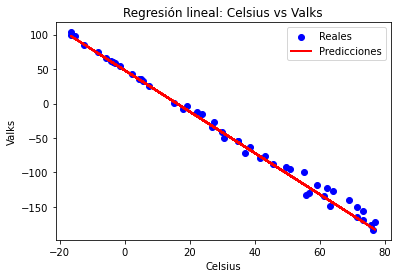

In [22]:
# Graficar los Valks reales del conjunto de prueba contra los Valks predichos por el modelo

# El parámetro color hace referencia a que los datos de Valks reales se graficarán en color azul y los predichos en color rojo

# Gráfico de datos reales

plt.scatter(test_data["Celsius"], test_data["Valks"], color = "blue", label = "Reales")

# Gráfico de los datos predichos

plt.plot(test_data["Celsius"], predicciones_valks_test, color = "red", label = "Predicciones", linewidth = 2) 

plt.xlabel("Celsius") # Graficar grados celsius en el eje horizontal

plt.ylabel("Valks") # Graficar Valks en el eje vertical

plt.title("Regresión lineal: Celsius vs Valks") # Título del gráfico

plt.legend() # Agregar leyenda al gráfico

plt.show() # Mostrar gráfico de datos reales vs predicciones del modelo

En términos generales, en la gráfica anterior se observa que las predicciones realizadas por el modelo implementado se aproximan de forma muy significativa a los datos reales en Valks del subconjunto de datos de prueba, lo cual se debe principalmente al hecho de en el gráfico de Valks reales contra los valks predichos por el modelo, se aprecia que la recta color rojo (valks predichos) se ajusta adecuadamente en su gran mayoría a los datos, por lo cual solamente una reducida minoría de los datos reales se ubican alejados de la recta roja referente al modelo encontrado, no obstante, dicho alejamiento es mínimo. Además de lo anterior, también cabe mencionar que dado el hecho de que los coeficientes del modelo encontrado para representar los datos son lo suficientemente mayores a 0 como para generar valores resultantes medianamente grandes, eso propicia que las predicciones derivadas del modelo también sean lo suficientmente grandes como para ajustarse en gran parte a los datos en valks reales del subconjunto de prueba como se evidencia en el gráfico anterior, motivo por el cual, se concluye que el algoritmo presenta en general un desempeño en su gran mayoría adecuado para predecir la equivalencia en Valks de los datos de temperatura en celsius, pertenecientes al dataset de prueba, por lo cual, además de lo anterior, también se afirma que las predicciones derivadas del modelo encontrado poseen un grado muy alto de precisión y como consecuencia, también poseen un elevado grado de confiabilidad para utilizarse en la toma de decisiones respecto a la temperatura adecuada para configurar la máquina reguladora de temperatura para erradicar el cambio climático mencionada en el challege 1 de Valhalla, por lo cual será posible saber con un alto grado de precisión, con qué cantidad en Valks configurar la máquina reguladora de temperatura para controlar la temperatura ambiental de forma correcta sin que el clima se torne excesivamente frío o cálido como para afectar la vida en el planeta Tierra. 